## Random Forest 

In [1]:
# Import necessary modules
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import joblib

# Load the dataset
iris_df = pd.read_csv('Iris.csv')

# Split into features and target variable
X = iris_df.iloc[:, 1:-1].values
y = iris_df.iloc[:, -1].values

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Standardize the features using a StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Encode the target variable using a LabelEncoder
encoder = LabelEncoder()
encoder.fit(y_train)
y_train_encoded = encoder.transform(y_train)
y_test_encoded = encoder.transform(y_test)

# Define hyperparameter grid for tuning the model
param_grid = {
    'n_estimators': [25, 50, 100, 200],
    'max_depth': [None, 1, 2, 3],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'criterion': ['gini', 'entropy']
}

# Train a Random Forest Classifier using GridSearchCV to find the optimal hyperparameters
rf_model = RandomForestClassifier(random_state=42)
rf_model_tuned = GridSearchCV(rf_model, param_grid, cv=5)
rf_model_tuned.fit(X_train_scaled, y_train_encoded)

# Evaluate the model's performance on the testing and training data
test_score = rf_model_tuned.score(X_test_scaled, y_test_encoded)
train_score = rf_model_tuned.score(X_train_scaled, y_train_encoded)
print(f'Testing score: {test_score:.2f}')
print(f'Training score: {train_score:.2f}')

# Make predictions on the test data using the tuned random forest classifier
y_pred = rf_model_tuned.predict(X_test_scaled)

# Generate a classification report to evaluate the performance of the model
print(f'Classification Report: {classification_report(y_test_encoded, y_pred)}')

# Save the trained model, StandardScaler, and LabelEncoder for later use
joblib.dump(rf_model_tuned, 'rf_model.sav')
joblib.dump(scaler, 'features_scaler.sav')
joblib.dump(encoder, 'label_encoder.sav')

Testing score: 0.98
Training score: 1.00
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



['label_encoder.sav']

In [5]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the saved model, StandardScaler, and LabelEncoder
rf_model_tuned = joblib.load('rf_model.sav')

In [8]:
# Load the dataset
iris_df = pd.read_csv('Iris.csv')

In [13]:
# Plot feature importance using Seaborn
feature_importances = pd.DataFrame(
    rf_model_tuned.best_estimator_.feature_importances_,
    index = iris_df.columns[1:-1],
    columns=['importance']).sort_values('importance', ascending=False)

In [17]:
feature_importances

,importance
PetalLengthCm,0.435875
PetalWidthCm,0.423670
SepalLengthCm,0.094298
SepalWidthCm,0.046158


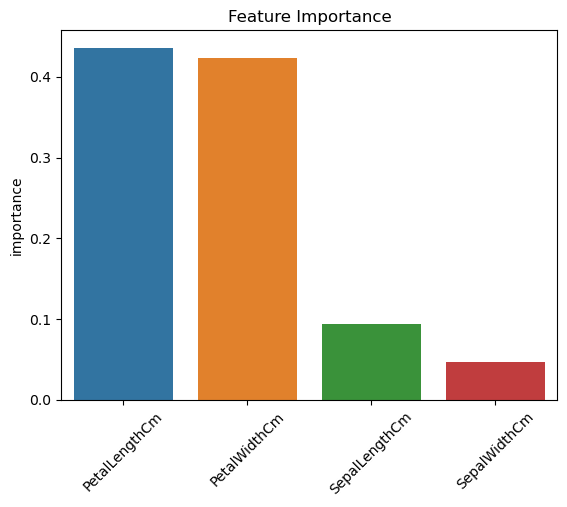

In [18]:
sns.barplot(x=feature_importances.index, y=feature_importances.importance)
plt.xticks(rotation=45)
plt.title('Feature Importance')
plt.show()

## Happy Learning :)